In [1]:
# This scripts is for regenerating the figures 3 and 4 (a and b) in the article provided in this repo
###Ecological divergence of wild strawberry DNA methylation patterns at distinct spatial scales###
###https://doi.org/10.1111/mec.15689###
# Please correct the directories according to where you are placing your inputs and where you want the plots to be saved
# More Clean inputs are provided in this repo as 'firstsheet.csv' and 'second.csv'

In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
# The input used here is the "DMCs" sheet of the paper data with no changes

In [2]:
# Reading the CSV file _This is the first sheet of the excel file provided in the article 
data = pd.read_csv(r"firstsheet.csv")

# Creating a new DataFrame to work with 
filtered = pd.DataFrame()
filtered["CHR"] = data["Chr_Position"]  
filtered["Class"] = data["Type"] 
filtered["Transposon"] = data["transposon?"]
filtered["Difference"] = data["|meth.diff|"]  
filtered.head

C:\Users\mshumaly\AppData\Local\Temp\ipykernel_14804\2749688877.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"firstsheet.csv")


<bound method NDFrame.head of                  CHR    Class Transposon  Difference
0         Fvb1_00655  Spatial        NaN   25.925926
1         Fvb1_04977  Spatial        NaN   72.727273
2      Fvb1_10010587  Spatial        NaN   54.974747
3      Fvb1_10010703  Spatial        NaN   69.140452
4      Fvb1_10021815  Spatial        NaN   89.677903
...              ...      ...        ...         ...
83557   Fvb7_9879508  Spatial        NaN   88.235294
83558   Fvb7_9879509  Spatial        NaN   82.051282
83559   Fvb7_9879535  Spatial        NaN   72.881356
83560   Fvb7_9879567  Spatial        NaN   47.368421
83561   Fvb7_9916400  Spatial        NaN   54.022989

[83562 rows x 4 columns]>

In [3]:
filtered.iloc[177,2] # Checking what we have in this cell

'transposonrelated'

In [4]:
# Incorporating the transposon class into the types and checking if it is done correctely
filtered.loc[filtered['Transposon'] == 'transposonrelated', 'Class'] = 'Transposon'
filtered.iloc[177,1]

'Transposon'

In [5]:
# Drop the "Transposon" column since it is already accounted for in the "Class" column
filtered.drop(filtered.columns[2], axis=1, inplace=True)
filtered.columns

Index(['CHR', 'Class', 'Difference'], dtype='object')

In [6]:
# Turning the "CHR" column into two columns that represent the gene name and position separately
filtered['Gene'] = filtered['CHR'].str.split('_').str[0]
filtered['Position'] = filtered['CHR'].str.split('_').str[1]

In [7]:
# Check!
filtered.head

<bound method NDFrame.head of                  CHR    Class  Difference  Gene  Position
0         Fvb1_00655  Spatial   25.925926  Fvb1     00655
1         Fvb1_04977  Spatial   72.727273  Fvb1     04977
2      Fvb1_10010587  Spatial   54.974747  Fvb1  10010587
3      Fvb1_10010703  Spatial   69.140452  Fvb1  10010703
4      Fvb1_10021815  Spatial   89.677903  Fvb1  10021815
...              ...      ...         ...   ...       ...
83557   Fvb7_9879508  Spatial   88.235294  Fvb7   9879508
83558   Fvb7_9879509  Spatial   82.051282  Fvb7   9879509
83559   Fvb7_9879535  Spatial   72.881356  Fvb7   9879535
83560   Fvb7_9879567  Spatial   47.368421  Fvb7   9879567
83561   Fvb7_9916400  Spatial   54.022989  Fvb7   9916400

[83562 rows x 5 columns]>

In [8]:
# Dropping NA values
filtered = filtered.dropna()

In [9]:
# Convert datatype of the column to float
filtered.loc[:, 'Position'] = filtered['Position'].astype(float)
filtered.loc[:, 'Difference'] = filtered['Difference'].astype(float)

C:\Users\mshumaly\AppData\Local\Temp\ipykernel_14804\2935631151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:, 'Position'] = filtered['Position'].astype(float)
C:\Users\mshumaly\AppData\Local\Temp\ipykernel_14804\2935631151.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered.loc[:, 'Position'] = filtered['Position'].astype(float)
C:\Users\mshumaly\AppData\Local\Temp\ipykernel_14804\2935631151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [10]:
# So far the dataframe is cleaned and ready to use
# We will work on plotting this data below (Figure 3 of the paper)

C:\Users\mshumaly\AppData\Local\Temp\ipykernel_14804\2208646471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['CHR'] = filtered['CHR'].str.strip()


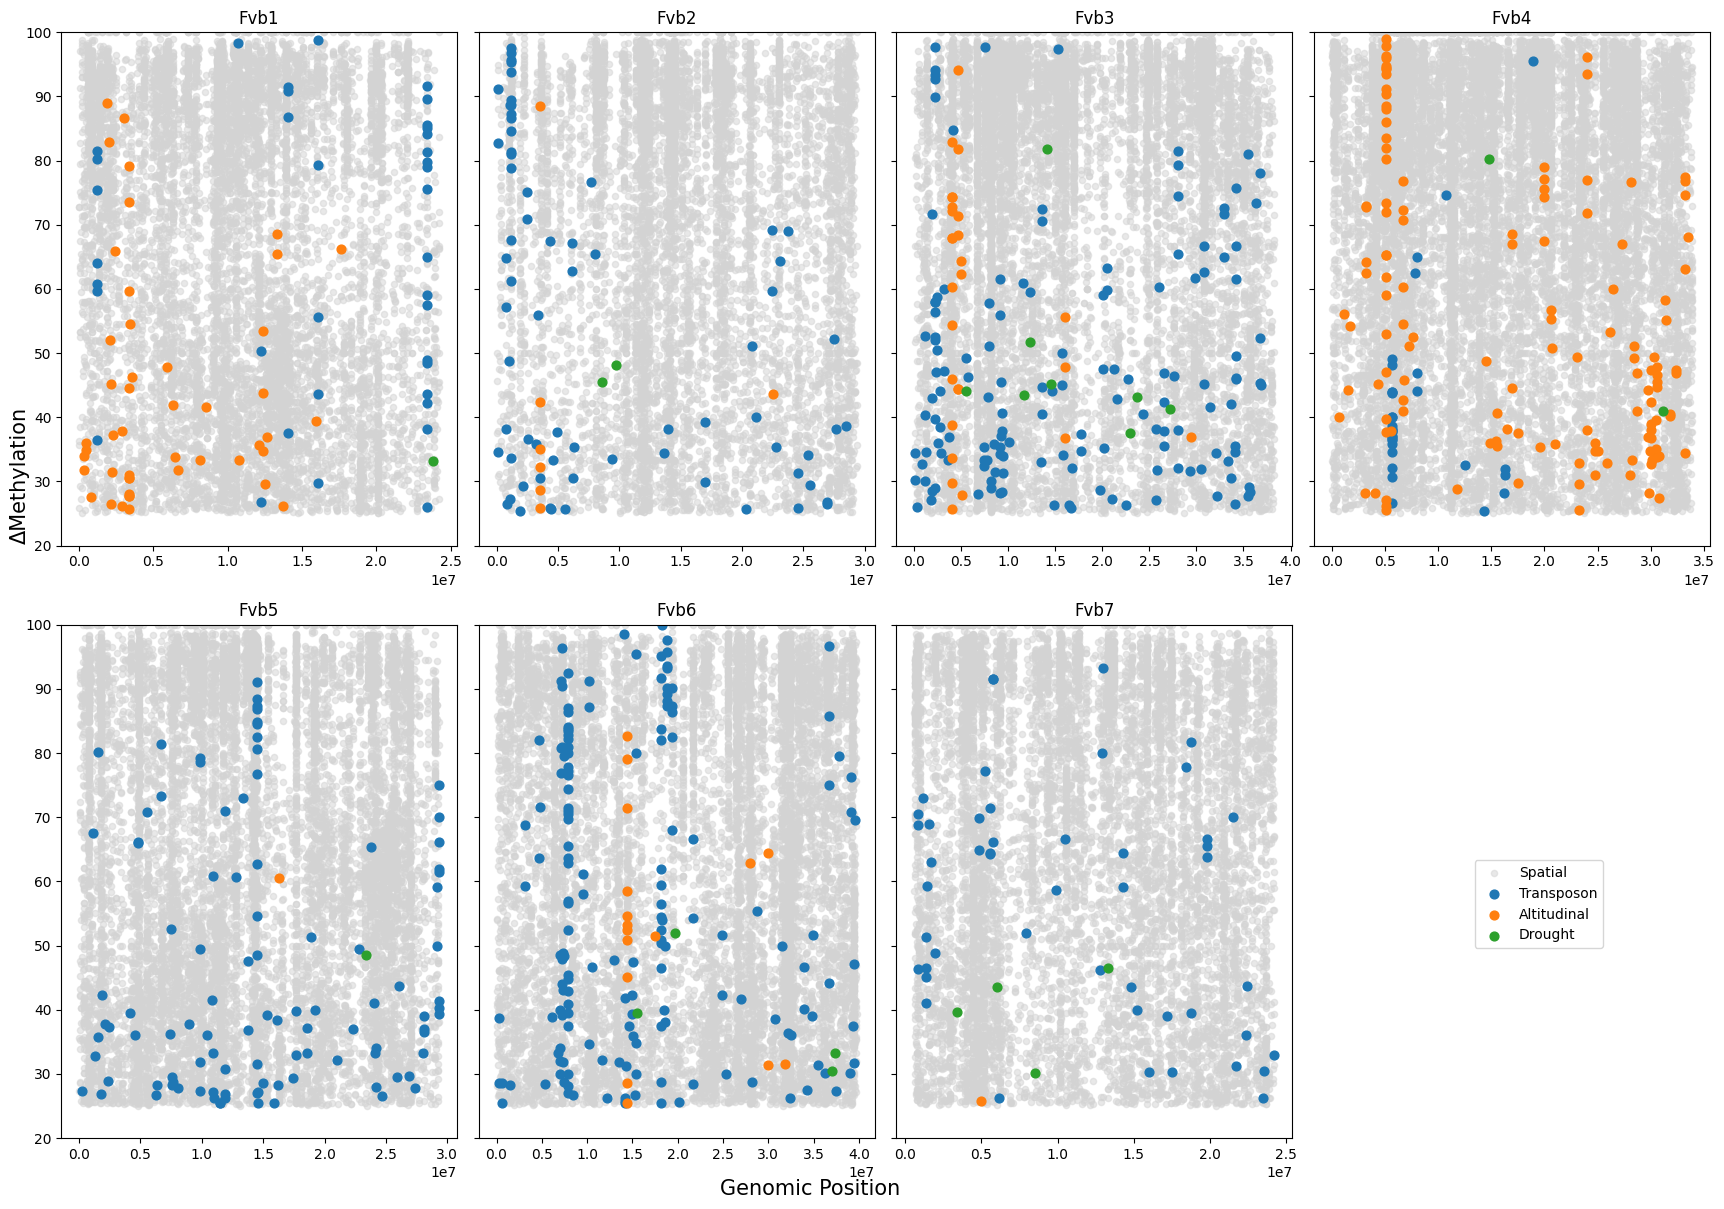

In [11]:
# Plot (Figure 3)
# Sample DataFrame (replace with your actual DataFrame)
filtered['CHR'] = filtered['CHR'].str.strip()

# Get categories from the "Gene" column
categories = filtered['Gene'].unique()
categories = categories[:7]  # Getting classes Fvb1 to Fvb7 

fig, axes = plt.subplots(2, 4, figsize=(20, 12), sharey=True)
axes = axes.flatten()

# Creating all plots in one canvas
for i, category in enumerate(categories):
    subset = filtered[filtered['Gene'] == category] 

    # Plot each class
    for class_name in subset['Class'].unique():
        class_subset = subset[subset['Class'] == class_name]
        if class_name == 'Spatial':
            # Special styling for "Spatial" since this data has a very higher frequency
            axes[i].scatter(class_subset['Position'], class_subset['Difference'], color='lightgray', label='Spatial', s=20, alpha=0.5)
        else:
            axes[i].scatter(class_subset['Position'], class_subset['Difference'], label=class_name, s=40)  
    
    axes[i].set_title(f'{category}')
    axes[i].set_ylim(20, 100)  
    
# Labels of X and Y axis
fig.text(0.4, 0, 'Genomic Position', ha='center', fontsize = 15)
fig.text(0, 0.6, 'ΔMethylation', va='center', rotation='vertical', fontsize = 15)

for j in range(i+1, 8):
    axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.8,0.2))

plt.tight_layout()
plt.subplots_adjust(right=0.85) 

# Replace with your dir for saving the plot
plt.savefig('figure3.png', dpi=300, bbox_inches='tight')

plt.show()


In [12]:
# Figure 4a

In [13]:
# Deleting 'Fvb0*' to make processing easier and check for dimensions of the data
print(filtered.shape)
filtered = filtered.loc[filtered['Gene'] != 'Fvb0*']
print(filtered.shape)

(83561, 5)
(83460, 5)


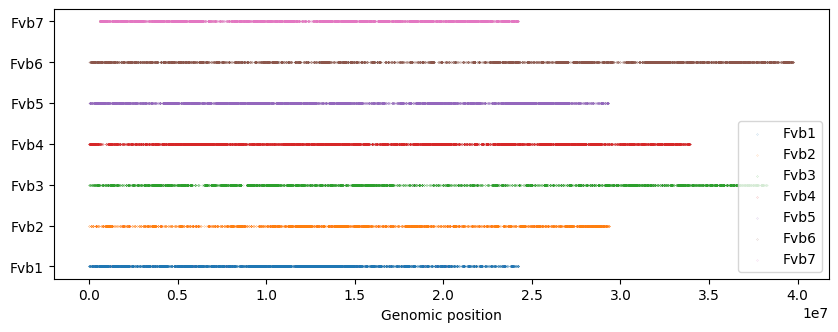

In [14]:
# Plot (Figure 4a)
# Define plot size
unique_genes = filtered['Gene'].unique()
plt.figure(figsize=(10, len(unique_genes) * 0.5)) 

# Scatter plot for each gene
for gene in unique_genes:
    gene_data = filtered[filtered['Gene'] == gene]
    plt.scatter(gene_data['Position'], [gene] * len(gene_data), label=gene, s=0.01)

plt.xlabel('Genomic position')
plt.legend()
plt.savefig('figure4a.png', dpi=300, bbox_inches='tight')

plt.show()

In [15]:
# Figure 4b

In [16]:
# The input used here is the "Clustering" sheet of the paper data and 
#it is only sorted to match the cluster sizes and values based on gene name

In [17]:
# Reading the CSV file
data2 = pd.read_csv(r"second.csv")

# Creating a new DataFrame
filtered2 = pd.DataFrame()
filtered2["Difference"] = data2["diff"]  
filtered2["ClusterSize"] = data2["ClusterSize"] 
filtered2.dropna()
filtered2.loc[:, 'ClusterSize'] = filtered2['ClusterSize'].astype(float)
filtered2.loc[:, 'Difference'] = filtered2['Difference'].astype(float)

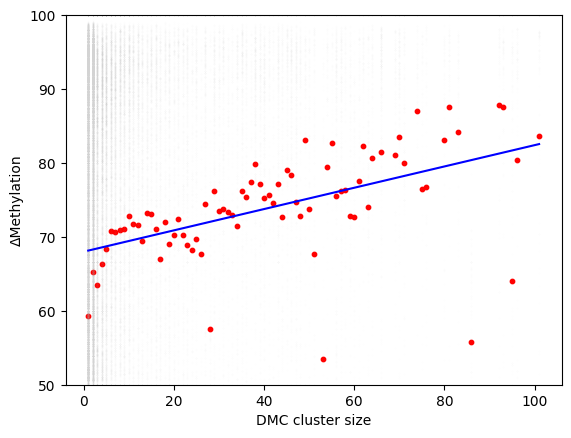

In [18]:
# Plot (Figure 4b)
df = filtered2
grouped = df.groupby('ClusterSize')['Difference'].apply(list).to_dict()

# Plot each unique "ClusterSize" with light gray color
for cluster_size, differences in grouped.items():
    plt.plot([cluster_size] * len(differences), differences, marker='o', markersize=0.01, linestyle='', color='lightgray')

# Mean values for each cluster size is shown in red
mean_diff = df.groupby('ClusterSize')['Difference'].mean()
plt.scatter(mean_diff.index, mean_diff.values, color='red', s=10)
plt.ylim(50, 100)

plt.xlabel('DMC cluster size')
plt.ylabel('ΔMethylation')

# Fit a linear regression line
slope, intercept, _, _, _ = linregress(mean_diff.index, mean_diff.values)
plt.plot(mean_diff.index, slope * mean_diff.index + intercept, color='blue')

plt.grid(False)
plt.savefig('figure4b.png', dpi=300, bbox_inches='tight')
plt.show()